<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Using_Pytorch_to_fight_cancer_(IV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pytorch to Fight Cancer

## 1. ALL IN!!!!


LET'S GET STARTED!!!!

### Setting our work environment

First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.

---
**Display Basic GPU Information**

---

In [68]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


### Setting our workspace: `/content` and `/content/datasets`



---
**Setting our Home**

---

We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.

In [69]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/teamspace/studios/this_studio


Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

---
**Mount Google Drive**

---

In [70]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive is mounted.")
else:
    print("You aren't in Google Colab.")


You aren't in Google Colab.



1. The code attempts to import the `google.colab` module, which is only available in the Google Colab environment.
2. If the import is successful, it sets the variable `IN_COLAB` to `True`. If the import fails (i.e., you are not in Colab), it sets `IN_COLAB` to `False`.
3. If `IN_COLAB` is `True` (indicating you are in Colab), it mounts Google Drive using `drive.mount('/content/drive')`.
4. If you are not in Colab, it prints a message indicating that you are not in Google Colab.

This way, you can conditionally run the code to mount Google Drive only when you are in the Colab environment.

## 2. Load a dataset (dataloader)

Create the dataset directory (if it doesn't exist), where we are going to save the dataset with which we are going to train our CNN.

---
**Create a directory where we can save our dataset**

---

In [71]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/teamspace/studios/this_studio


Check if the file specified by `file` does not exist in the current directory. If it doesn't exist, the code block inside the conditional, which in this case would be downloading the file from the specified URL, is executed. then, it extracts the contents of `exp0.zip` into the current directory quietly, overwriting any existing files if necessary.

---
**Change to new directory datasets**

---

In [72]:
%%time

# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp4val.zip'):
  !wget -q https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
!unzip -qq -o exp4val.zip

dataset_dir = /teamspace/studios/this_studio/datasets


CPU times: user 45.9 ms, sys: 27.6 ms, total: 73.5 ms
Wall time: 3.5 s


### Inspect the Dataset

# Skin lesion recognition in 7 classes:

*  0: 'akiec' - actinic keratosis

*  1: 'bcc' - basal cell carcinoma

*  2: 'bkl' - benign keratosis

*  3: 'df' - dermatofibroma

*  4: 'mel' - melanoma

*  5: 'nv' - melanocytic nevus

*  6: 'vasc' - vascular lesion


The dataset contains several thousand photos of cell images in seven subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:

---
**Display the datapath structure.**

---

In [73]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = datasets_dir

# Print the directory tree
print_directory_tree(data_dir)

datasets
    |-- __MACOSX
        |-- exp0
            |-- test
                |-- class_0
                |-- class_1
            |-- train
                |-- class_0


                |-- class_1
            |-- val
                |-- class_0
                |-- class_1
        |-- test
            |-- class_1
        |-- train
            |-- class_0
            |-- class_1
            |-- class_2
            |-- class_3
            |-- class_4
            |-- class_5
            |-- class_6
        |-- val
            |-- class_0
    |-- exp0
        |-- test
            |-- class_0
            |-- class_1
        |-- train
            |-- class_0
            |-- class_1
        |-- val
            |-- class_0
            |-- class_1
    |-- test
        |-- class_0
        |-- class_1
        |-- class_2
        |-- class_3
        |-- class_4
        |-- class_5
        |-- class_6
    |-- train
        |-- class_0
        |-- class_1
        |-- class_2
        |-- class_3
        |-- class_4
        |-- class_5
        |-- class_6
    |-- val
        |-- class_0
        |-- class_1
        |-- class_2
        |-- class_3
        |-- class_4
  


---
**Display 8 images from a class from test**

---

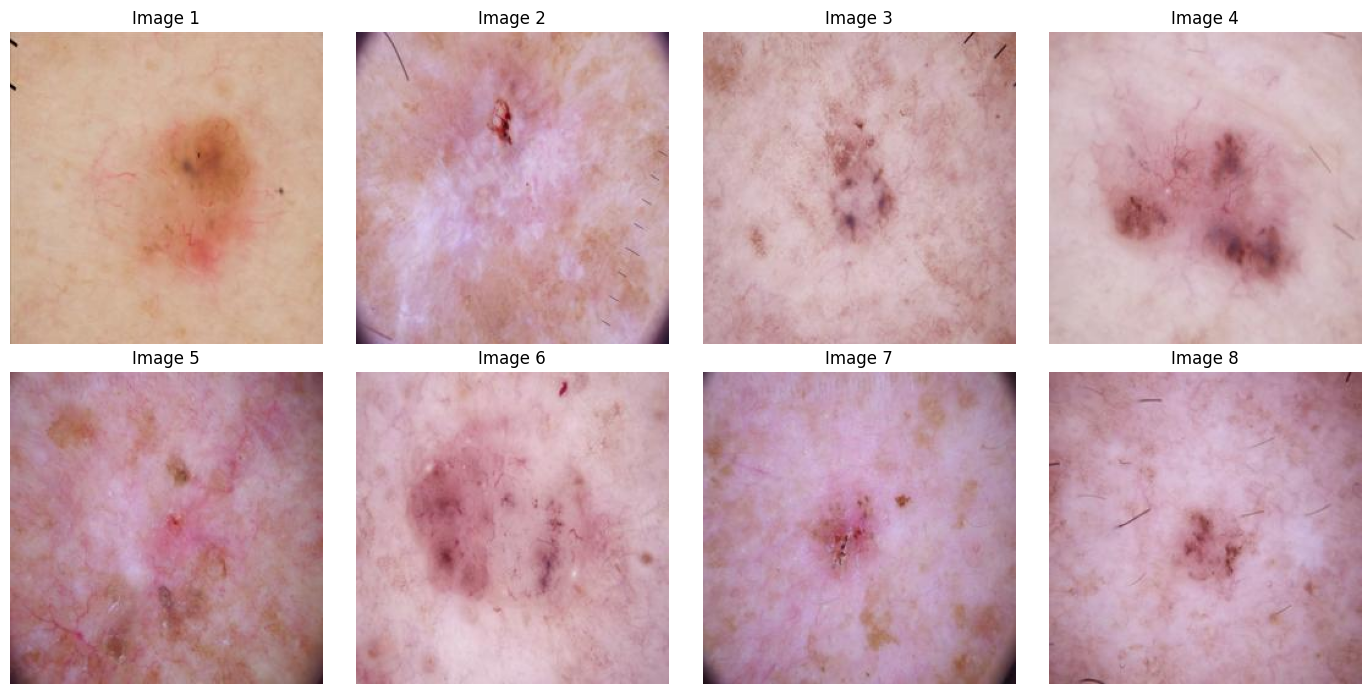


 Size of image:  (256, 256, 3)


In [74]:
# creates a figure with subplots arranged in a 2x4 grid
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{HOME}/datasets/test/class_1/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
print("\n Size of image: ", img.shape)

### Setting a Dataloader

The purpose of a **DataLoader** is fundamental in the context of machine learning and deep learning, especially when working with large or complex datasets. Its main purpose is to facilitate the efficient loading and manipulation of data during model training.



---
**Load Libraries for DataLoader**

---

In [75]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, ConcatDataset

>**Note**: These time magics (%time and %%time) will give you information about how long it takes to execute the code in the respective cell in Google Colab. The results will be displayed below the cell after the execution is completed.

---
**Create a Dataloader for train, val y test sets**

---

In [76]:
%%time

# 1. Calculate the mean and standard deviation on the training set.
# train, validation and test data directory

train_dir = f"{HOME}/datasets/train/"
val_dir  = f"{HOME}/datasets/val/"
test_dir   = f"{HOME}/datasets/test/"

# transform to calculate mean and standard desviation
transform = transforms.Compose([
    transforms.ToTensor()  # transform images to tensor
])

# Load the ImageFolder dataset and apply the transformation
dataset = datasets.ImageFolder(root= train_dir, transform=transform)

# it's better to use a loader to retrieve images (tensors)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize variables to store the sum of pixel values and
# standard deviation.
# These variables are set to floating-point zeros to ensure
# accurate calculations.
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

# Iterates over the data loader (loader),
# calculates the mean and standard deviation across all channels
# for each batch(0) and spatial dimensions (height(2) and width(3))
for images, _ in loader:
    mean_sum += torch.mean(images, dim=[0, 2, 3])
    std_sum += torch.std(images, dim=[0, 2, 3])
    total_samples += 1

mean = mean_sum / total_samples
std = std_sum / total_samples

print("Total train samples:", total_samples)
print("Mean:", mean)
print("Std:", std)

Total train samples: 7350
Mean: tensor([0.7536, 0.5706, 0.6018])
Std: tensor([0.0849, 0.1106, 0.1187])
CPU times: user 33.7 s, sys: 467 ms, total: 34.2 s
Wall time: 17.5 s


---
**Transform the dataloaders for data augmentation**

---
- **Initial Transformations**: Various augmentation techniques like flipping, cropping, rotating, color jittering, affine transformations, blurring, and perspective changes are defined.  
- **Enhancing Transformations**: Each augmentation technique is enhanced by converting images to tensors and normalizing them.  
- **Final Output**: The list of transformations is updated and printed.

These transformations are typically applied during the training process to increase the diversity of the training data, helping to improve the generalization of the deep learning model.


In [77]:
%%time

# Define the data transformations to be applied
# to each transformed dataset
transformations = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(64, padding=4, padding_mode='reflect'),
    transforms.RandomRotation(5, fill=(0, 0, 0)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    #transforms.RandomAffine(degrees=3, translate=(0.1, 0.1), scale=(0.8, 0.8), fill=(0, 0, 0)),
    transforms.GaussianBlur(kernel_size=3),
    #transforms.RandomPerspective(distortion_scale=0.5, p=1.0, fill=(0, 0, 0)),
    #transforms.RandomErasing(p=0.5, scale=(1.0, 1.0), ratio=(1.0, 1.0), value='random'),
    #transforms.RandomResizedCrop(64, scale=(0.8, 0.8), ratio=(0.75, 1.33333333)),
]

# Add the ToTensor() and Normalize() transformation
# to each data transformation
for i in range(len(transformations)):
    transformations[i] = transforms.Compose([
        transformations[i],
        transforms.Resize((64,64)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

print(transformations)

[Compose(
    RandomHorizontalFlip(p=0.5)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    RandomCrop(size=(64, 64), padding=4)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=(0, 0, 0))
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=None)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5

---
**Normalize the dataloaders using Statistics**

---

- **Normalization**: Normalization is crucial for ensuring that pixel values across images are on a similar scale, which helps in stabilizing and speeding up the training process of deep neural networks.  
- **Dataset Preparation**: Each dataset (`train_data`, `val_set`, `test_set`) is prepared with consistent transformations and normalization, facilitating uniformity in data processing across training, validation, and testing phases.

This setup ensures that the datasets are properly preprocessed and ready to be used in training and evaluating machine learning models, particularly deep neural networks, using PyTorch.

In [78]:
%%time

# 2. Normalize the training set using these statistics.
train_data = datasets.ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

# 3. Normalize the test and validation set using the same statistics
# calculated on the training set.
val_set = datasets.ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

test_set = datasets.ImageFolder(test_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

print(f"Length of Train Data :{len(train_data)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")

classes = train_data.classes
print('Classes: ', classes)

Length of Train Data :7350
Length of Validation Data : 1050
Length of Test Data : 210
Classes:  ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
CPU times: user 22.2 ms, sys: 8.02 ms, total: 30.2 ms
Wall time: 86.6 ms


The train set is unmodified in size because `transform()` transform the data but it don't augment the dataset

---
**Augment Data**

---

The train set is modified in size because `ConcatDataset()` augment the dataset.

In [79]:
# Apply each transformation separately to a transformed dataset
# and concatenate them.
train_set = train_data
for transform in transformations:
    transformed_data = datasets.ImageFolder(train_dir,transform = transform)
    train_set = ConcatDataset([train_set, transformed_data])

print(f"Length of Train Data :{len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")


Length of Train Data :44100
Length of Validation Data : 1050
Length of Test Data : 210


---
**Display the transformations for an image**

---

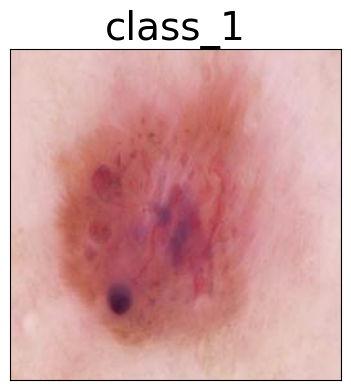

In [106]:
import itertools
import numpy as np
import os
import matplotlib.pyplot as plt
from torchvision import transforms

# Asumiendo que mean y std ya están definidos y que inv_normalize se ha creado

# Define una transformación mínima que sólo convierte a tensor
basic_transform = transforms.Compose([
    transforms.ToTensor()
])

# DataLoader que no aplica las transformaciones complejas, sólo convierte a tensor
basic_dataloader = torch.utils.data.DataLoader(
    datasets.ImageFolder(train_dir, transform=basic_transform),
    batch_size=32,
    shuffle=True
)

# Obtener filas y columnas para la figura
nrows, ncols = 1, 1  # Solo una imagen

# Configurar la figura
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4), subplot_kw={'facecolor': "#ebf5ff"})

# Obtener un índice aleatorio
rb_index = np.random.randint(0, len(basic_dataloader))

# Obtener el batch correspondiente al índice aleatorio
imgs, labels = next(itertools.islice(basic_dataloader, rb_index, rb_index + 1))

# Mostrar la imagen y su etiqueta
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(classes[labels[0]], fontsize=28)
ax.imshow(imgs[0].permute(1, 2, 0)) 
fig.tight_layout()
plt.show()


<class 'torch.Tensor'>
<class 'PIL.Image.Image'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>
<class 'torch.Tensor'>


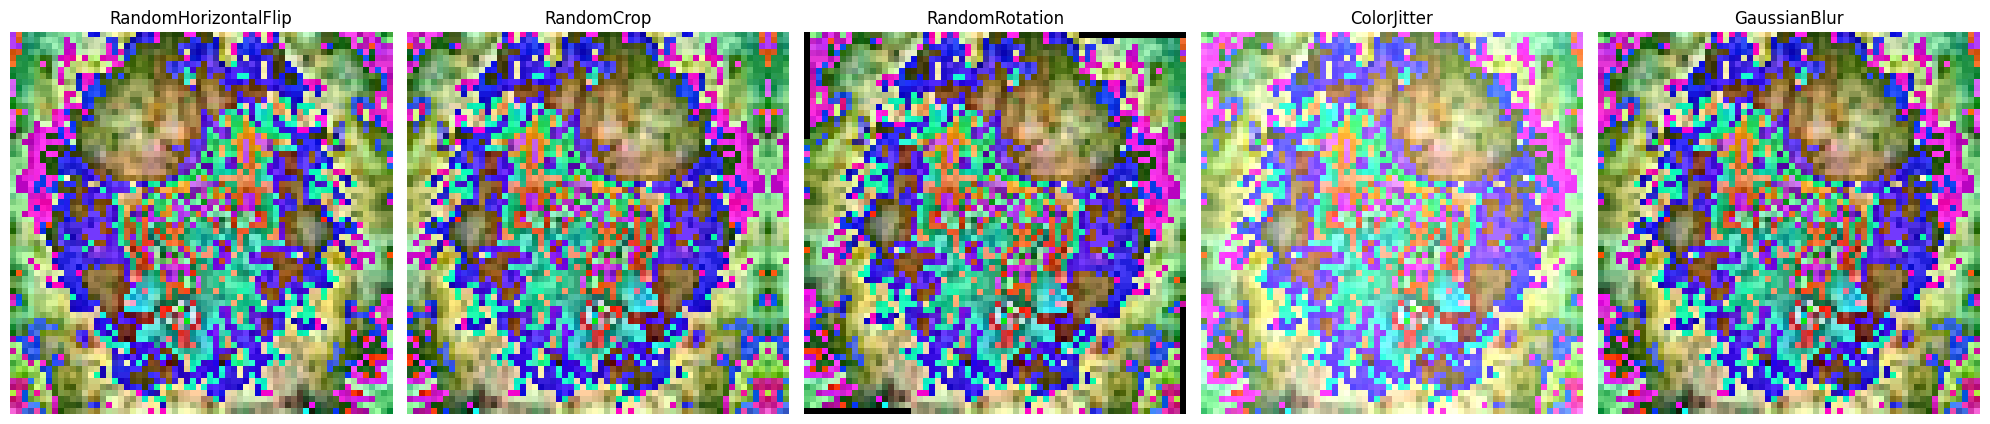


 Size of original image:  <built-in method size of Tensor object at 0x7f6fd2c03ba0>


In [109]:
from torchvision.transforms import ToPILImage
import random

# Convertir la imagen de tensor a PIL para visualizar las transformaciones
to_pil = ToPILImage()

# Crear una transformación de desnormalización
inv_normalize = transforms.Normalize(
    mean=[-m/s for m, s in zip(mean, std)],
    std=[1/s for s in std]
)

# Configurar la figura con subplots
fig, axs = plt.subplots(1, len(transformations), figsize=(20, 5))

# Iterar a través de las transformaciones y mostrar las imágenes transformadas
for i, transform in enumerate(transformations):
    # Obtener una imagen del train_set
    img_tensor, _ = train_set[10]
    print(type(img_tensor))

    # Convertir la imagen a PIL antes de aplicar la transformación
    img = to_pil(img_tensor)
    print(type(img))

    # Aplicar la transformación a la imagen original
    transformed_image = transform(img)
    #transformed_image = transforms.ToPILImage()(transformed_image)
    print(type(transformed_image))

    # Desnormalizar y convertir la imagen transformada de tensor a PIL para mostrar
    transformed_img = inv_normalize(transformed_image).permute(1, 2, 0)  # Desnormalizar la imagen
    #transformed_image = transformed_image.permute(1, 2, 0) 
    #transformed_image = transformed_image.clamp(0, 1)  # Asegurarse de que los valores están en el rango [0, 1]

    # Mostrar la imagen transformada
    axs[i].imshow(transformed_img)
    axs[i].set_title(type(transform.transforms[0]).__name__)  # Mostrar el nombre de la transformación
    axs[i].axis('off')

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()

print("\n Size of original image: ", img_tensor.size)

### Displaying all classes

Let us show one example for each class, for fun. As we've transformed the image by normalizing it, we should undo the transformation before visualizing the image.

---
**Display one example from each class**

---


CPU times: user 26.5 s, sys: 766 ms, total: 27.3 s
Wall time: 28.7 s


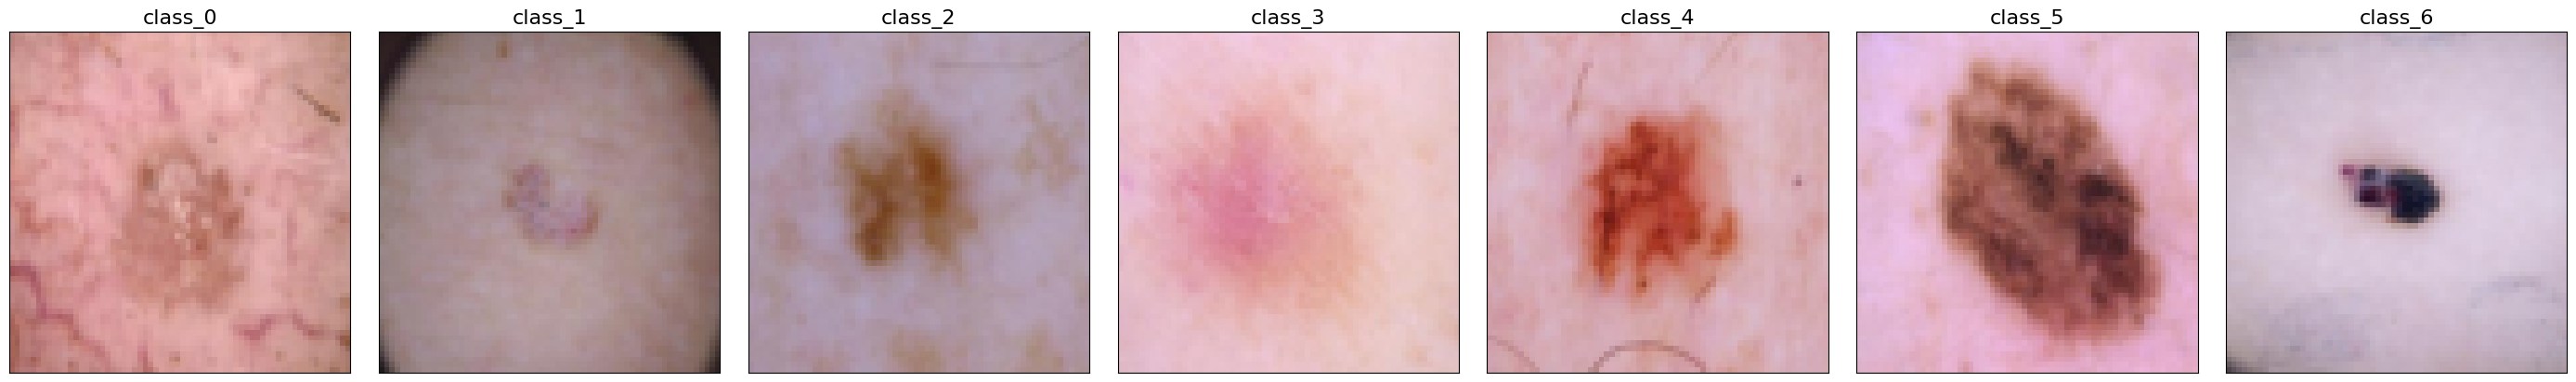

In [14]:
%%time
inv_normalize = transforms.Normalize(
  mean= [-m/s for m, s in zip(mean, std)],
  std= [1/s for s in std]
)

fig, ax = plt.subplots(nrows=1, ncols=len(classes), figsize=(7*4,1*4),
                       subplot_kw={'facecolor': "#ebf5ff"})

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[i], fontsize=16)
  img = next(img for img,label in train_set if label == i)
  #ax.imshow(img.permute(1,2,0)) # for normalized channels
  ax.imshow(inv_normalize(img).permute(1,2,0)) # for unnormalized

fig.tight_layout()


### Settings Hyperparameters

We are going to define some training parameters for the network, such as the number of batches, epochs, and classes in the dataset because they are needed for dataloaders in order to set up our training loop.

---
**Define batch_size, epochs and obtain the number of classes**

---

We will **run only 5 epochs** to check functionality. Later, we will load a model that has already been trained for 30 epochs.

In [15]:
# batch size defines how many training or testing samples
# to use in a single iteration
batch_size = 32
# epochs define the number of iterations
epochs = 20
# num_classes define the number of the class
num_classes = len(classes)
print(f"Number of Classes: {num_classes}")

Number of Classes: 7


----
**Define the train and test loaders for the training loop**

---

In [16]:
%%time

# Create dataloaders object for training/val loop.

train_dataloader = DataLoader(
  train_set,
  batch_size=batch_size,
  shuffle=True,
  num_workers=2)

val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)

CPU times: user 128 µs, sys: 0 ns, total: 128 µs
Wall time: 131 µs




Now, we define a function to obtain ncols and nrows need for a given number of images in order to display them.

---
**Define a small function to determine the columns and rows needed for a given number of images**

---

In [17]:
# We define a small function to determine the columns and rows needed
# for a given number of images.
def rows_cols(input):

    divisors = []

    # Realize a little operation with input
    # in order to determine divisors for input
    for i in range(1, input+1): # not divide by 0
        if input % i == 0:
            divisors.append(i)

    # divisors list size
    n = len(divisors)

    # If the size is odd, the element in the middle is the median value.
    if n % 2 != 0:
        median_index = (n - 1) // 2
        rows = divisors[median_index]
    # If the size is even, the two elements in the middle are equal
    else:
        median_index1 = n // 2 - 1
        rows = divisors[median_index1]

    cols = int(input/rows)
    return rows, cols


To see how the DataLoader works and how it handles the loaded data, we will select a random batch and display it, indicating its class label as well. It is said, we can display all images and its ground truth from a random batch in a easy way with dataloaders.

---
**Display all images and its ground truth from a random batch**

---

Alongside 'normal' images, we should observe transformed images.

CPU times: user 1.7 s, sys: 748 ms, total: 2.44 s
Wall time: 27.4 s


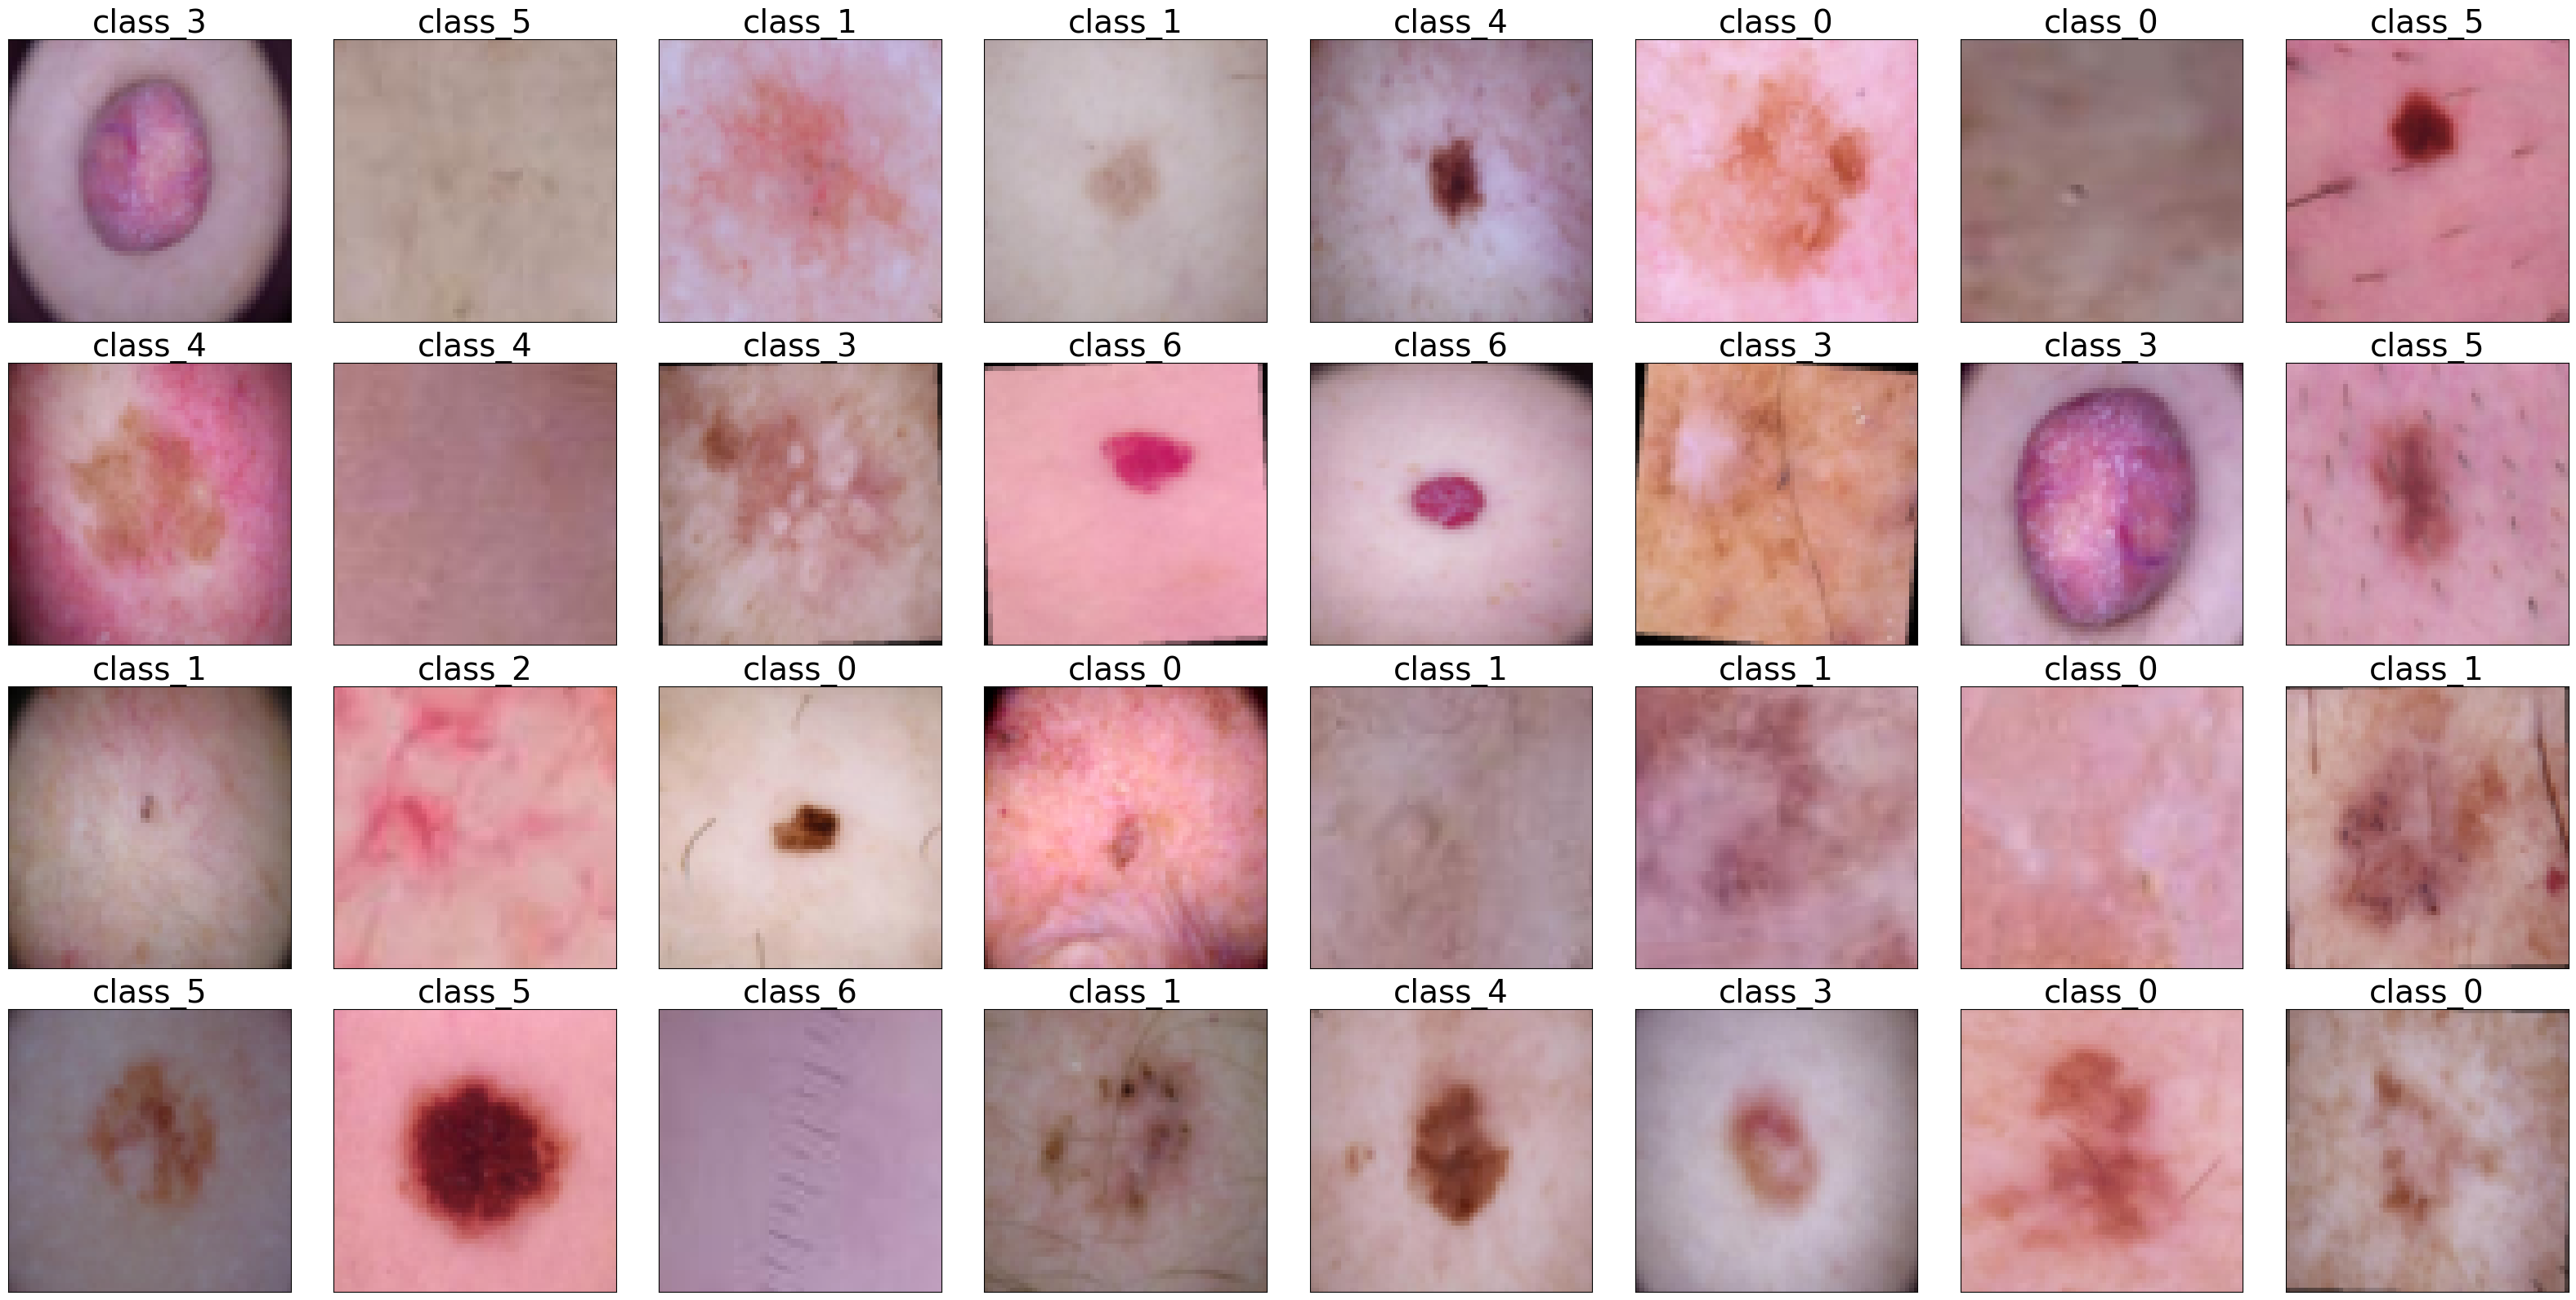

In [18]:
%%time

import itertools
import numpy as np
import os

nrows,ncols = rows_cols(batch_size)

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*4,nrows*4),
                       subplot_kw={'facecolor': "#ebf5ff"})
rb_index = np.random.randint(0, len(train_dataloader))

# Obtener el batch correspondiente al índice aleatorio
imgs, labels = next(itertools.islice(train_dataloader, rb_index, rb_index+1))

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[labels[i]], fontsize=28)
  #ax.imshow(imgs[i].permute(1,2,0)) # for unnormalized
  ax.imshow(inv_normalize(imgs[i]).permute(1,2,0)) # for unnormalized

fig.tight_layout()

## 3. Define a [Convolutional Neural Network](https://pytorch.org/docs/stable/nn.html)

---
**import Libraries**

---


In [19]:
import torch.nn as nn
import torch.nn.functional as F

---
**Ensure reproducibility**

---

In [20]:
import random
import numpy as np
import torch

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    # Ensure that the same deterministic algorithms are used
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)  # Example seed value

---
**Define the Model**

---

To enhance previous CNN model, we can make several adjustments:

1. **Dropout Layers**: Add dropout layers to reduce overfitting.
2. **Residual Connections**: Adding residual connections can improve the learning capability of deep networks.
3. **Global Average Pooling**: Replace the `Flatten` layer with a global average pooling layer to reduce the number of parameters and prevent overfitting.
4. **Learning Rate Scheduler**: Implement a scheduler to dynamically adjust the learning rate during training.
5. **Weight Initialization**: Properly initialize the weights to improve convergence.
6. **Data Augmentation**: While not part of the model architecture, performing data augmentation during training can improve performance.




In [21]:

class myCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            # Layer 1: Conv2d + BatchNorm + ReLU
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            # Layer 2: Conv2d + BatchNorm + ReLU
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            # Layer 3: MaxPool2d
            nn.MaxPool2d(2, 2),

            # Layer 4: Conv2d + BatchNorm + ReLU
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Layer 5: Conv2d + BatchNorm + ReLU
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Layer 6: MaxPool2d
            nn.MaxPool2d(2, 2),

            # Layer 7: Conv2d + BatchNorm + ReLU
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # Layer 8: Conv2d + BatchNorm + ReLU
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # Layer 9: MaxPool2d
            nn.MaxPool2d(2, 2),

            # Layer 10: Global Average Pooling
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.fc_layers = nn.Sequential(
            # Layer 11: Linear + BatchNorm + ReLU + Dropout
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),

            # Layer 12: Linear + BatchNorm + ReLU + Dropout
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.5),

            # Layer 13: Linear
            nn.Linear(64, 7)
        )

    def forward(self, xb):
        xb = self.network(xb)
        xb = xb.view(xb.size(0), -1)  # Flatten for the fully connected layer
        xb = self.fc_layers(xb)
        return xb

# Weight initialization function
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)




**Explanation of Changes**:

1. **Dropout**: Added `nn.Dropout` after the linear layers to reduce overfitting.
2. **Global Average Pooling**: Replaced `nn.Flatten` with `nn.AdaptiveAvgPool2d` to reduce dimensionality without explicitly flattening.
3. **Weight Initialization**: Added a weight initialization function that uses Kaiming initialization to improve convergence.
4. **Residual Connections**: Not included in this version but can be considered for a more advanced version.

These changes can improve the model's generalization capability and efficiency.

### Setting the Computing Device

Let's change the execution environment to T4.

---
**Setting CUDA environment**

---

>**NOTE:** Outside of Google Colab, it is necessary to explicitly specify the device (GPU or CPU) and manage model parallelization if using multiple GPUs. This is crucial to ensure the model runs on the intended GPU and leverages the available hardware effectively. While Google Colab manages GPU allocation automatically, specifying the device ("cuda") and using `nn.DataParallel` can still be beneficial for explicit control and utilization of available resources, especially if you have specific requirements or want to ensure optimal performance. However, for many basic use cases, simply  letting Colab manage the resources with automatic GPU selection) will suffice.

---
**Setting CUDA environment**

---

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


model = myCNN().to(device)
model.apply(weights_init)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

print(model)

Using cpu device
myCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(



---
**Display the summary of our model**

---

In [23]:
!pip install torchsummary -q

from torchsummary import summary

summary(model, (3,64,64)) # input = [3,64,64]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
       BatchNorm2d-5           [-1, 64, 64, 64]             128
              ReLU-6           [-1, 64, 64, 64]               0
         MaxPool2d-7           [-1, 64, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]          73,856
       BatchNorm2d-9          [-1, 128, 32, 32]             256
             ReLU-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 128, 32, 32]         147,584
      BatchNorm2d-12          [-1, 128, 32, 32]             256
             ReLU-13          [-1, 128, 32, 32]               0
        MaxPool2d-14          [-1, 128,

### Define a Loss function and optimizer




---

**Define a Loss Function and a Optimizer**

---


In [24]:
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
# Define your optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,
                            momentum=0.9,
                            weight_decay=0.001 )
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Defining Training Loop

---
**Defining train**

---

In [25]:
def train(dataloader, model, criterion, optimizer):
  running_loss, corrects, current = 0, 0, 0
  size = len(dataloader.dataset) # number images from dataset
  print(f"Training:")
  model.train() #training mode on
  loop = tqdm(train_dataloader) # Initialize a progress bar
  for batch, (X, y) in enumerate(loop):
    # take data (X) and label (y) from a batch
    X, y = X.to(device), y.to(device) # Move the data and labels
                                      # to the device (CPU or GPU)

    # forward pass
    preds = model(X) # Compute predictions
    loss = criterion(preds, y) # Compute the loss between predictions and labels

    # backpropagation
    optimizer.zero_grad()   # zero the gradient buffers
    loss.backward()         # compute gradients to backwards
    optimizer.step()        # Does the "update weights" of model

    # Calculate Output Metrics training_loss, training_accuracy

    # 1. loss.item() contains the loss of entire mini-batch converted to scalar
    running_loss += loss.item() # Accumulate the loss for this batch

    # 2. current image (last image in the batch) for progressive bar
    current += len(X) # Update the current number of processed images

    # 3. From the predictions, I select the index (class) of the one with
    # the highest value and compare it with the label (class). The boolean value
    # is converted into a float (true becomes 1, false becomes 0), and all are
    # summed up. Finally, 'item' converts them into a scalar value.
    # This way, 'corrects' reflects the number of correct predictions (accuracy)
    corrects += (preds.argmax(1) == y).type(torch.float).sum().item()

    # 4. running loss is the sum of our loss. Training loss is a running average
    # through batches
    training_loss = running_loss/(batch+1)

    # 5. Training accuracy = number of corrects predictions/number of processed images
    training_accuracy = corrects/current

    # Update the progress bar with current epoch, batch, and metrics
    loop.set_description(f'[{epoch + 1}/{epochs} epochs, {current:>5d}/{len(train_dataloader.dataset):>5d} data]')
    loop.set_postfix(Training_Loss=training_loss, Accuracy=f'{100*corrects/current:>0.1f}%')

  return training_loss, training_accuracy

---
**Defining val**

---

In [26]:
def val(dataloader, model, criterion):
  size = len(dataloader.dataset) # number images from dataset to evaluate
  num_batches = len(dataloader)  # number of batches

  # Evaluation (test)) Mode
  model.eval()

  val_loss, corrects = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # prediction for a dataset not used in training
      # compute prediction error and number of corrects
      # through batches
      preds = model(X)
      val_loss += criterion(preds, y).item()
      corrects += (preds.argmax(1) == y).type(torch.float).sum().item()
  val_loss /= num_batches
  corrects /= size
  print(f"Val: \n Accuracy: {(100*corrects):>0.1f}%, val_Loss: {val_loss:>8f} \n")

  return val_loss, corrects

To create directories named `train1`, `train2`, etc., each time you execute a training loop, you can modify the code to check the number of existing training directories and then create the next directory in sequence. Here's an example of how you could do this:

---
**Create Train directories**

---

In [27]:
import os
import torchvision.models as models

def create_train_dir():
  """
  Creates a directory named train within the current directory.
  """
  # Current directory
  current_dir = os.getcwd()
  print(current_dir)

  # Base path to the "train" directory
  base_train_dir = os.path.join(current_dir, 'train')

  # Determine the next training directory name
  train_dirs = [d for d in os.listdir(current_dir) if d.startswith('train') and d[5:].isdigit()]
  train_dirs.sort(key=lambda x: int(x[5:]) if x[5:].isdigit() else -1)
  next_train_num = 1 if not train_dirs else int(train_dirs[-1][5:]) + 1
  train_dir = os.path.join(current_dir, f'train{next_train_num}')

  # Create the next training directory
  os.makedirs(train_dir, exist_ok=True)
  print(f"Training directory: {train_dir}")
  return train_dir

---
**Define checkpoint and resume function**

---

In [28]:
import torch

def checkpoint(model, filename):
    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename)['model'])
    optimizer.load_state_dict(torch.load(filename)['optimizer'])



 ---
 **Best Model and Early Stopping**

 ---


 ATENCION GUARDAR LA METRICAS QUE NO SE GUARDAN

In [29]:
%%time

from tqdm import tqdm # progress bar
import csv

early_stop_thresh = 7
best_accuracy = -1
best_epoch = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
os.chdir(HOME)
train_dir = create_train_dir()


for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    best_epoch = epoch+1
    checkpoint(model, os.path.join(train_dir,"best_model.pth"))
    print(f'best model in epoch={epoch+1} with Accuracy={(100*acc_val):>0.1f}%')
  elif epoch - best_epoch >= early_stop_thresh:
    print(f"Early stopped training at epoch {epoch+1} due to {early_stop_thresh} epochs whitout enhacement")
    break  # terminate the training loop
print("Done!. Finished Training")

/teamspace/studios/this_studio
Training directory: /teamspace/studios/this_studio/train6
Training:


[1/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [16:14<00:00,  1.42it/s, Accuracy=39.2%, Training_Loss=1.58]


Val: 
 Accuracy: 50.4%, val_Loss: 1.232364 

best model in epoch=1 with Accuracy=50.4%
Training:


[2/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [16:19<00:00,  1.41it/s, Accuracy=47.1%, Training_Loss=1.37]


Val: 
 Accuracy: 60.6%, val_Loss: 1.078546 

best model in epoch=2 with Accuracy=60.6%
Training:


[3/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [15:48<00:00,  1.45it/s, Accuracy=52.1%, Training_Loss=1.27]


Val: 
 Accuracy: 65.3%, val_Loss: 0.938428 

best model in epoch=3 with Accuracy=65.3%
Training:


[4/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [15:58<00:00,  1.44it/s, Accuracy=57.1%, Training_Loss=1.16]


Val: 
 Accuracy: 60.0%, val_Loss: 1.057775 

Training:


[5/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [19:54<00:00,  1.15it/s, Accuracy=60.7%, Training_Loss=1.07]


Val: 
 Accuracy: 61.8%, val_Loss: 1.068353 

Training:


[6/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [19:39<00:00,  1.17it/s, Accuracy=63.3%, Training_Loss=1.01]


Val: 
 Accuracy: 64.0%, val_Loss: 0.978398 

Training:


[7/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [19:36<00:00,  1.17it/s, Accuracy=65.5%, Training_Loss=0.953]


Val: 
 Accuracy: 65.5%, val_Loss: 1.003335 

best model in epoch=7 with Accuracy=65.5%
Training:


[8/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [17:49<00:00,  1.29it/s, Accuracy=67.4%, Training_Loss=0.896]


Val: 
 Accuracy: 59.5%, val_Loss: 1.244360 

Training:


[9/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [15:58<00:00,  1.44it/s, Accuracy=69.5%, Training_Loss=0.851]


Val: 
 Accuracy: 70.3%, val_Loss: 0.904666 

best model in epoch=9 with Accuracy=70.3%
Training:


[10/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [16:36<00:00,  1.38it/s, Accuracy=71.7%, Training_Loss=0.787]


Val: 
 Accuracy: 66.1%, val_Loss: 1.000163 

Training:


[11/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [17:32<00:00,  1.31it/s, Accuracy=73.6%, Training_Loss=0.749]


Val: 
 Accuracy: 61.5%, val_Loss: 1.610692 

Training:


[12/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [16:17<00:00,  1.41it/s, Accuracy=74.6%, Training_Loss=0.722]


Val: 
 Accuracy: 65.5%, val_Loss: 1.208891 

Training:


[13/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [17:20<00:00,  1.33it/s, Accuracy=76.9%, Training_Loss=0.664]


Val: 
 Accuracy: 66.7%, val_Loss: 1.103718 

Training:


[14/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [17:40<00:00,  1.30it/s, Accuracy=78.2%, Training_Loss=0.631]


Val: 
 Accuracy: 61.9%, val_Loss: 1.201906 

Training:


[15/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [18:05<00:00,  1.27it/s, Accuracy=79.6%, Training_Loss=0.599]


Val: 
 Accuracy: 62.0%, val_Loss: 1.298472 

Training:


[16/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [17:00<00:00,  1.35it/s, Accuracy=80.8%, Training_Loss=0.562]


Val: 
 Accuracy: 63.3%, val_Loss: 1.351789 

Training:


[17/20 epochs, 44100/44100 data]: 100%|██████████| 1379/1379 [21:01<00:00,  1.09it/s, Accuracy=81.4%, Training_Loss=0.538]


Val: 
 Accuracy: 66.4%, val_Loss: 1.068963 

Early stopped training at epoch 17 due to 7 epochs whitout enhacement
Done!. Finished Training
CPU times: user 9h 28min 16s, sys: 12min 21s, total: 9h 40min 37s
Wall time: 5h 1min 38s


---
**Displaying the metrics curves model (only 20 last epochs)**

---

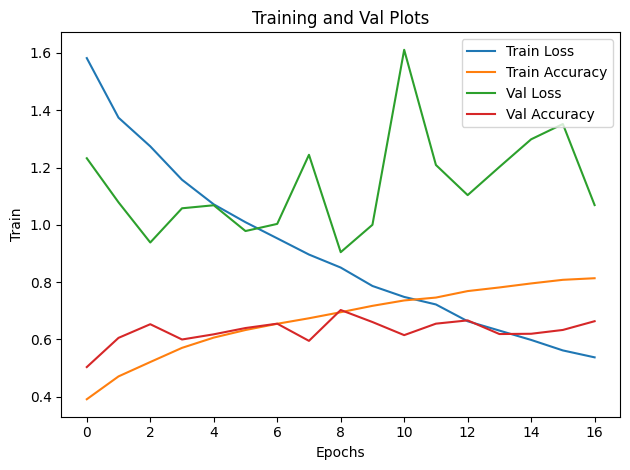

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epoch+1), loss_train_history, label="Train Loss")
ax.plot(range(epoch+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epoch+1), loss_val_history, label="Val Loss")
ax.plot(range(epoch+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

## Validating our model


---
**Validation Metrics**

---

In [31]:
import torch
import os
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np

# Define una función para obtener las predicciones del modelo
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    for batch in dataloader:
        inputs, etiquetas_batch = batch
        inputs = inputs.to(device)  # Si estás utilizando GPU, mueve los datos a la GPU
        outputs = modelo(inputs)
        _, predicciones = torch.max(outputs, 1)
        preds.extend(predicciones.tolist())
        etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Define el dispositivo (CPU o GPU) en el que se realizarán las operaciones
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo guardado
#train_dir = "/teamspace/studios/this_studio/train2"
model_file = os.path.join(train_dir, "best_model.pth")
checkpoint = torch.load(model_file, map_location=device)
model_state_dict = checkpoint['model']

# Supongamos que 'val_dataloader' es tu DataLoader de validación

# Definir y cargar el modelo
# Asegúrate de definir tu modelo adecuadamente
model = myCNN()
model.load_state_dict(model_state_dict)
model.to(device)
model.eval()

# Obtén las predicciones del modelo y las etiquetas verdaderas del conjunto de validación
predicciones_val, etiquetas_val = obtener_predicciones(model, val_dataloader)

# Calcular la matriz de confusión
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Imprimir la matriz de confusión completa
print("Matriz de Confusión:")
print(cm)

# Si deseas obtener métricas como precisión, sensibilidad, etc. para múltiples clases,
# puedes calcularlas de la siguiente manera:

# Calcular precisión por clase
precision_por_clase = cm.diagonal() / cm.sum(axis=0)
print("Precisión por clase:", precision_por_clase)

# Calcular recall por clase
recall_por_clase = cm.diagonal() / cm.sum(axis=1)
print("Recall por clase:", recall_por_clase)

# Calcular F1-score por clase
f1_por_clase = 2 * (precision_por_clase * recall_por_clase) / (precision_por_clase + recall_por_clase)
print("F1-score por clase:", f1_por_clase)


Matriz de Confusión:
[[ 70  13  21  12  31   0   3]
 [ 17 101   7   5  12   1   7]
 [  9   3  79   6  44   7   2]
 [ 11   4   0 120  15   0   0]
 [  4   1  21   0 120   4   0]
 [  2   3   6   2  26 109   2]
 [  5   0   0   0   0   6 139]]
Precisión por clase: [0.59322034 0.808      0.58955224 0.82758621 0.48387097 0.85826772
 0.90849673]
Recall por clase: [0.46666667 0.67333333 0.52666667 0.8        0.8        0.72666667
 0.92666667]
F1-score por clase: [0.52238806 0.73454545 0.55633803 0.81355932 0.60301508 0.78700361
 0.91749175]


---
**Get confusion metrics**

---

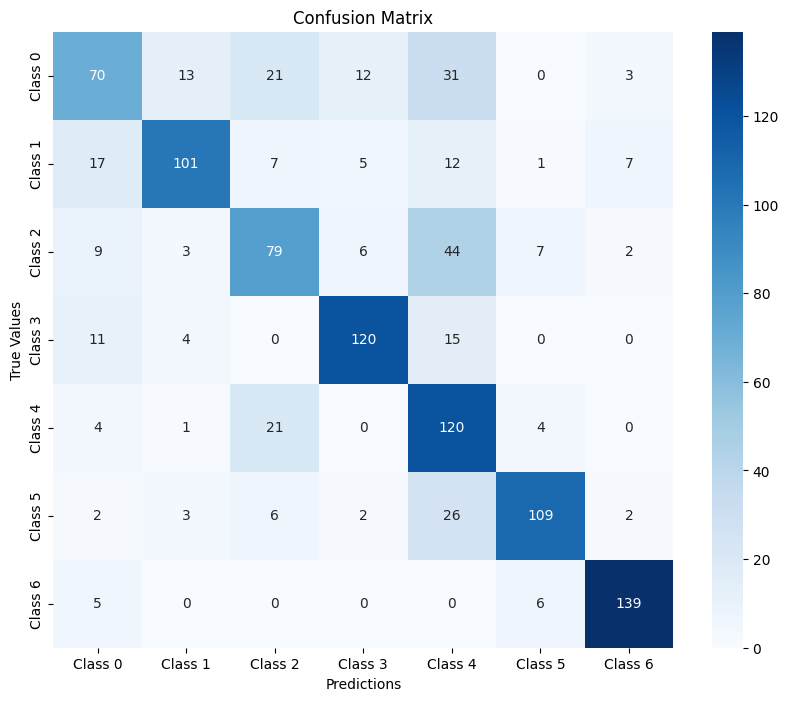

In [32]:
!pip install seaborn -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'etiquetas_val' are the true labels and 'predicciones_val' are the model predictions

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Define the labels for the confusion matrix
labels = [f'Class {i}' for i in range(len(cm))]

# Create a Pandas DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()


---

**Display a ROC curve**

---


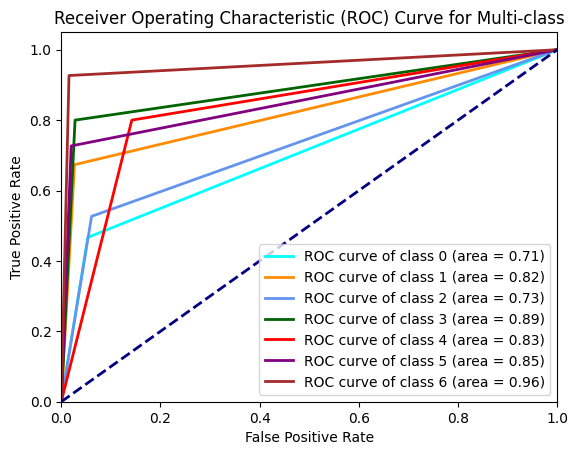

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Supongamos que 'predicciones_val' y 'etiquetas_val' son las predicciones y etiquetas verdaderas del conjunto de validación
# Obtenidas previamente usando la función obtener_predicciones()

# Número de clases
n_classes = len(set(etiquetas_val))

# Binarizar las etiquetas
etiquetas_val_binarized = label_binarize(etiquetas_val, classes=[i for i in range(n_classes)])
predicciones_val_binarized = label_binarize(predicciones_val, classes=[i for i in range(n_classes)])

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(etiquetas_val_binarized[:, i], predicciones_val_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'darkgreen', 'red', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()
